# Utilisation de WOFOST pour les données clients

Ce fichier présente l'utilisation de WOFOST comme d'un modèle pour simuler la croissance des plantes des champs correspondant au données fournies par le client.

In [1]:
from pcse.fileinput import YAMLCropDataProvider
from pcse.fileinput import CABOFileReader
from pcse.models import Wofost72_WLP_FD
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

cropd = YAMLCropDataProvider()
plantes_disponibles = cropd.get_crops_varieties()
for element in plantes_disponibles.keys():
    print('Type de plante:', element, ', nombres de variétés:', len(plantes_disponibles[element]))

Type de plante: barley , nombres de variétés: 1
Type de plante: cassava , nombres de variétés: 1
Type de plante: chickpea , nombres de variétés: 1
Type de plante: cotton , nombres de variétés: 1
Type de plante: cowpea , nombres de variétés: 1
Type de plante: fababean , nombres de variétés: 1
Type de plante: groundnut , nombres de variétés: 1
Type de plante: maize , nombres de variétés: 6
Type de plante: millet , nombres de variétés: 1
Type de plante: mungbean , nombres de variétés: 1
Type de plante: pigeonpea , nombres de variétés: 1
Type de plante: potato , nombres de variétés: 9
Type de plante: rapeseed , nombres de variétés: 4
Type de plante: rice , nombres de variétés: 9
Type de plante: sorghum , nombres de variétés: 1
Type de plante: soybean , nombres de variétés: 7
Type de plante: sugarbeet , nombres de variétés: 4
Type de plante: sugarcane , nombres de variétés: 1
Type de plante: sunflower , nombres de variétés: 1
Type de plante: sweetpotato , nombres de variétés: 1
Type de plan

On choisit la pomme de terre adaptée à nos champs: c'est donc la catégorie <b>potato</b>, sous-catégorie <b>Markies</b> que l'on choisira.

In [2]:
cropd.set_active_crop('potato', 'Markies')
print('Paramètres disponibles:', list(cropd.keys()))

Paramètres disponibles: ['CO2EFFTB', 'CO2TRATB', 'CO2AMAXTB', 'TBASEM', 'TEFFMX', 'TSUMEM', 'IDSL', 'DLO', 'DLC', 'TSUM1', 'TSUM2', 'DTSMTB', 'DVSI', 'DVSEND', 'VERNBASE', 'VERNSAT', 'VERNDVS', 'VERNRTB', 'TDWI', 'RGRLAI', 'SLATB', 'SPA', 'SSATB', 'SPAN', 'TBASE', 'KDIFTB', 'EFFTB', 'AMAXTB', 'REFCO2L', 'TMPFTB', 'TMNFTB', 'CVL', 'CVO', 'CVR', 'CVS', 'Q10', 'RML', 'RMO', 'RMR', 'RMS', 'RFSETB', 'FRTB', 'FLTB', 'FSTB', 'FOTB', 'PERDL', 'RDRRTB', 'RDRSTB', 'CFET', 'DEPNR', 'IAIRDU', 'IOX', 'RDI', 'RRI', 'RDMCR', 'NMAXLV_TB', 'NMAXRT_FR', 'NMAXST_FR', 'NMAXSO', 'NCRIT_FR', 'NRESIDLV', 'NRESIDST', 'NRESIDRT', 'TCNT', 'NFIX_FR', 'PMAXLV_TB', 'PMAXRT_FR', 'PMAXST_FR', 'PMAXSO', 'PCRIT_FR', 'PRESIDLV', 'PRESIDST', 'PRESIDRT', 'TCPT', 'KMAXLV_TB', 'KMAXRT_FR', 'KMAXST_FR', 'KMAXSO', 'KCRIT_FR', 'KRESIDLV', 'KRESIDST', 'KRESIDRT', 'TCKT', 'DVS_NPK_STOP', 'DVS_NPK_TRANSL', 'NLAI_NPK', 'NSLA_NPK', 'NPART', 'NLUE_NPK', 'NPK_TRANSLRT_FR', 'RDRLV_NPK', 'RNUPTAKEMAX', 'RPUPTAKEMAX', 'RKUPTAKEMAX']


On choisi de même un type de sol adapté au problème. On va prendre le type de sol `ec3` contenu dans le fichier `ec3.soil`. L'indice du sol correspond à la finesse du sol: 3 correspond à une finesse intermédiaire (de 1 à 5) et est donc adapté à notre situation.

In [3]:
soildata = CABOFileReader('ec3.soil')
print(soildata)

** $Id: ec3.new 1.2 1997/09/18 17:33:54 LEM release $
**
** SOIL DATA FILE for use with WOFOST Version 5.0, June 1990
**
** EC3-medium fine
------------------------------------
SMW: 0.104 <class 'float'>
SMFCF: 0.3 <class 'float'>
SM0: 0.41 <class 'float'>
CRAIRC: 0.06 <class 'float'>
K0: 25.586 <class 'float'>
SOPE: 1.47 <class 'float'>
KSUB: 1.47 <class 'float'>
RDMSOL: 80 <class 'int'>
SPADS: 0.1 <class 'float'>
SPODS: 0.03 <class 'float'>
SPASS: 0.2 <class 'float'>
SPOSS: 0.05 <class 'float'>
DEFLIM: -0.3 <class 'float'>
SOLNAM: EC3-medium fine <class 'str'>
SMTAB: [-1.0, 0.41, 1.0, 0.398, 1.3, 0.389, 1.491, 0.38, 2.0, 0.34, 2.4, 0.287, 2.7, 0.241, 3.4, 0.148, 4.204, 0.104, 6.0, 0.09] <class 'list'>
CONTAB: [0.0, 1.408, 1.0, 0.167, 1.3, -0.215, 1.491, -0.638, 1.7, -0.854, 2.0, -1.155, 2.4, -1.796, 2.7, -2.26, 3.0, -2.745, 3.4, -3.357, 3.7, -3.824, 4.0, -4.276, 4.204, -4.678] <class 'list'>



In [4]:
from pcse.util import WOFOST71SiteDataProvider
sitedata = WOFOST71SiteDataProvider(WAV = 100, CO2=420)
print('Données du terrain:', sitedata)

Unknown parameter values provided to WOFOSTSiteDataProvider: {'CO2': 420}
Données du terrain: {'IFUNRN': 0, 'NOTINF': 0, 'SSI': 0.0, 'SSMAX': 0.0, 'WAV': 100.0, 'SMLIM': 0.4}


On peut maintenant se servir du module `PCSE` pour compacter l'ensemble des paramètres en un type facilement exploitable par WOFOST

In [5]:
from pcse.base import ParameterProvider
from pcse.fileinput import YAMLAgroManagementReader
from pcse.db import NASAPowerWeatherDataProvider

parameters = ParameterProvider(cropdata=cropd, soildata=soildata, sitedata=sitedata) # Paramètres de la simulation
agromanagement = YAMLAgroManagementReader('Markies_calendar.yaml')                   # Calendrier de la simulation
agromanagement_arro = YAMLAgroManagementReader('Markies_calendar_arro.yaml')         # Calendrier de la simulation avec arrosage
wdp = NASAPowerWeatherDataProvider(latitude=49.56, longitude=2.47)                   # Données météorologiques
print(agromanagement)
print(agromanagement_arro)
print(wdp)

!!python/object/new:pcse.fileinput.yaml_agro_loader.YAMLAgroManagementReader
listitems:
- 2022-04-22:
    CropCalendar:
      crop_end_date: null
      crop_end_type: maturity
      crop_name: potato
      crop_start_date: 2022-05-01
      crop_start_type: emergence
      max_duration: 365
      variety_name: Markies
    StateEvents: null
    TimedEvents: null
- 2022-09-15: null

!!python/object/new:pcse.fileinput.yaml_agro_loader.YAMLAgroManagementReader
listitems:
- 2022-04-22:
    CropCalendar:
      crop_end_date: null
      crop_end_type: maturity
      crop_name: potato
      crop_start_date: 2022-05-01
      crop_start_type: emergence
      max_duration: 365
      variety_name: Markies
    StateEvents: null
    TimedEvents:
    - comment: All irrigation amounts in cm
      event_signal: irrigate
      events_table:
      - 2022-05-28:
          amount: 2.3
          efficiency: 0.7
      - 2022-06-04:
          amount: 2.1
          efficiency: 0.7
      - 2022-06-15:
          

On peut maintenant se servir de WOFOST à proprement parler, en entrainement le modèle. On va réaliser deux simulations, une avec l'irrigation contenues dans le fichier `agromanagement_arro.yaml` et une sans cette irigation dans `agromanagement.yaml`.

In [6]:
wofost = Wofost72_WLP_FD(parameters, wdp, agromanagement)
wofost_arro = Wofost72_WLP_FD(parameters, wdp, agromanagement_arro)

wofost.run_till_terminate()
wofost_arro.run_till_terminate()

df = pd.DataFrame(wofost.get_output()).set_index("day")
df_arro = pd.DataFrame(wofost_arro.get_output()).set_index("day")

On peut maintenant comparer les résultats des deux simulations, en traçant notre variable d'intérêt, ici la surface des feuilles (LAI).

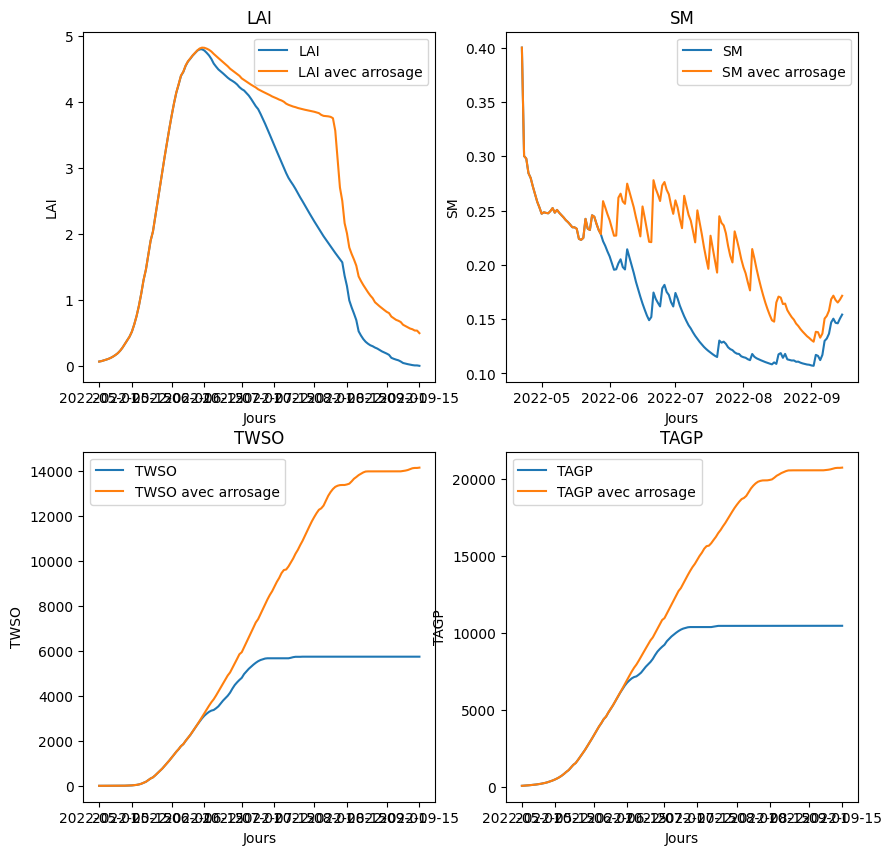

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

x = np.asarray(df.index, dtype='datetime64[s]')

ax[0][0].plot(df['LAI'], label='LAI')
ax[0][0].plot(df_arro['LAI'], label='LAI avec arrosage')
ax[0][0].set_title('LAI')
ax[0][0].legend()
ax[0][0].set_xlabel('Jours')
ax[0][0].set_ylabel('LAI')

ax[0][1].plot(df['SM'], label='SM')
ax[0][1].plot(df_arro['SM'], label='SM avec arrosage')
ax[0][1].set_title('SM')
ax[0][1].legend()
ax[0][1].set_xlabel('Jours')
ax[0][1].set_ylabel('SM')


ax[1][0].plot(df['TWSO'], label='TWSO')
ax[1][0].plot(df_arro['TWSO'], label='TWSO avec arrosage')
ax[1][0].set_title('TWSO')
ax[1][0].legend()
ax[1][0].set_xlabel('Jours')
ax[1][0].set_ylabel("TWSO")



ax[1][1].plot(df['TAGP'], label='TAGP')
ax[1][1].plot(df_arro['TAGP'], label='TAGP avec arrosage')
ax[1][1].set_title('TAGP')
ax[1][1].legend()
ax[1][1].set_xlabel('Jours')
ax[1][1].set_ylabel('TAGP')

plt.show()